In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


import warnings
warnings.filterwarnings("ignore")

# **Exploring Data**

In [2]:
df = pd.read_csv(r"c:\Users\tanuj\Downloads\Assessment-2-Associate-DS.csv")

In [3]:
df.head()

,weekend_date,channel,brand,category,sub_category,EAN,quantity
0,2022-06-04,Channel1,B1,Body,Body Lotion,8906087773818,56.0
1,2022-06-11,Channel1,B1,Body,Body Lotion,8906087773818,122.0
2,2022-06-18,Channel1,B1,Body,Body Lotion,8906087773818,102.0
3,2022-06-25,Channel1,B1,Body,Body Lotion,8906087773818,128.0
4,2022-07-02,Channel1,B1,Body,Body Lotion,8906087773818,97.0


In [4]:
df.shape

(600, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekend_date  600 non-null    object 
 1   channel       600 non-null    object 
 2   brand         600 non-null    object 
 3   category      600 non-null    object 
 4   sub_category  600 non-null    object 
 5   EAN           600 non-null    int64  
 6   quantity      600 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 32.9+ KB


In [6]:
df.isna().sum()

weekend_date    0
channel         0
brand           0
category        0
sub_category    0
EAN             0
quantity        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['weekend_date', 'channel', 'brand', 'category', 'sub_category', 'EAN',
       'quantity'],
      dtype='object')

In [9]:
df["quantity"].describe()

count     600.000000
mean      547.330000
std       925.749108
min         1.000000
25%       121.000000
50%       244.500000
75%       624.500000
max      8051.000000
Name: quantity, dtype: float64

# **Cleaning Data**

In [10]:
def clean_data(df):
    df["weekend_date"] = df["weekend_date"].astype(str).str[:10]  
    df["weekend_date"] = pd.to_datetime(df["weekend_date"])  
    df = df.sort_values(by="weekend_date")  
    df.set_index("weekend_date", inplace=True)  
    
    return df


In [11]:
df = clean_data(df)

In [12]:
df_new = df[["quantity"]]

In [13]:
df_new = pd.DataFrame(df_new.groupby(df_new.index)["quantity"].sum())

In [23]:
df_new.describe()

,quantity
count,119.000000
mean,2759.647059
std,2094.876444
min,203.000000
25%,1593.000000
50%,2129.000000
75%,3236.500000
max,11816.000000


# **EDA**

**Checking the distribution of quantity and As we can see that data is right skwed so there must outliars**

**Confirming outliars using box plot**

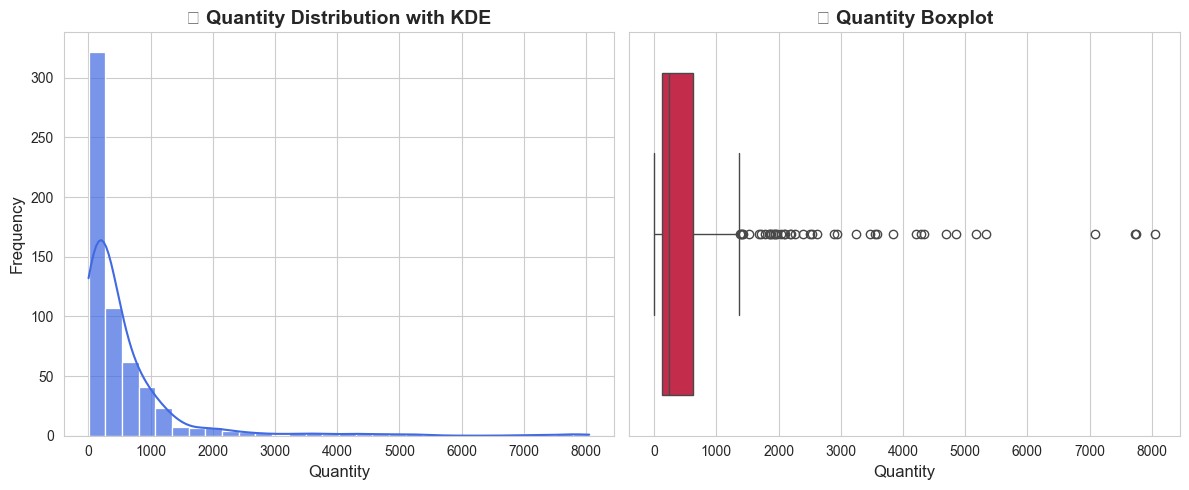

In [15]:
# Set the seaborn style
sns.set_style("whitegrid")

# Create a 1-row, 2-column subplot layout
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram with KDE
sns.histplot(df["quantity"], kde=True, color="royalblue", bins=30, alpha=0.7, ax=ax[0])
ax[0].set_title("📊 Quantity Distribution with KDE", fontsize=14, fontweight="bold")
ax[0].set_xlabel("Quantity", fontsize=12)
ax[0].set_ylabel("Frequency", fontsize=12)

# Boxplot
sns.boxplot(x=df["quantity"], color="crimson", ax=ax[1])
ax[1].set_title("📦 Quantity Boxplot", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Quantity", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

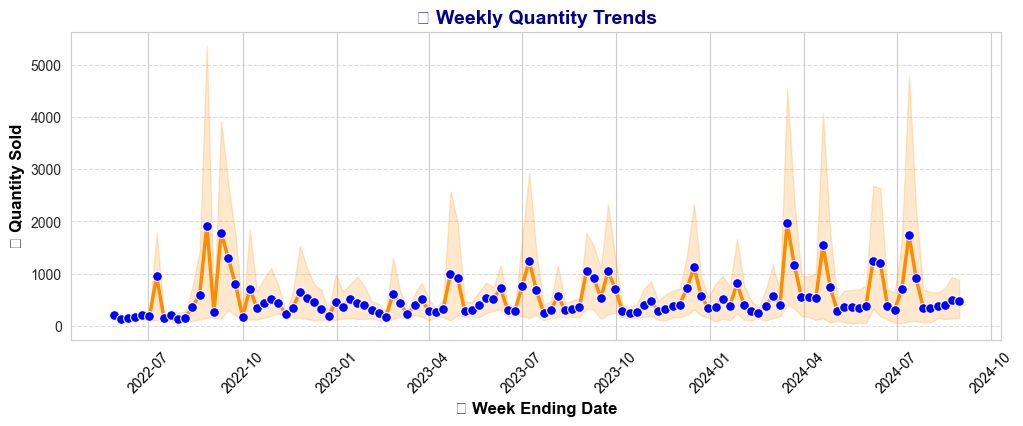

In [16]:
# Set style for a professional look
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(12, 4))

# Lineplot with better aesthetics
sns.lineplot(data=df, x=df.index, y="quantity", color="darkorange", linewidth=2.5, marker="o", markersize=7, markerfacecolor="blue")

# Title & Labels with better font weight
plt.title('📈 Weekly Quantity Trends', fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel('📅 Week Ending Date', fontsize=12, fontweight="bold", color="black")
plt.ylabel('📊 Quantity Sold', fontsize=12, fontweight="bold", color="black")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, color="black")

# Add grid for better visibility
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [17]:
df.columns

Index(['channel', 'brand', 'category', 'sub_category', 'EAN', 'quantity'], dtype='object')

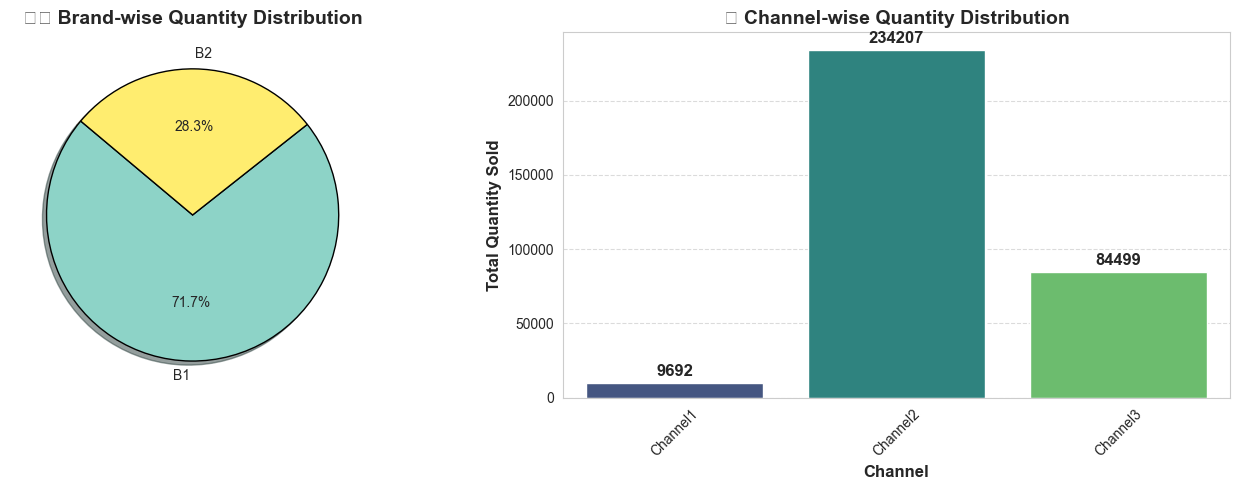

In [18]:
# Grouping Data
brand_sales = df.groupby("brand")["quantity"].sum()
channel_sales = df.groupby("channel")["quantity"].sum()

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- PIE CHART (Brand Sales) ---
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(brand_sales)))  # Bright & varied colors
axes[0].pie(
    brand_sales, labels=brand_sales.index, autopct="%.1f%%", startangle=140, 
    colors=colors_pie, wedgeprops={"edgecolor": "black", "linewidth": 1}, shadow=True
)
axes[0].set_title("🛍️ Brand-wise Quantity Distribution", fontweight="bold", fontsize=14)

# --- BAR CHART (Channel Sales) ---
colors_bar = sns.color_palette("viridis", len(channel_sales))  # Bright yellow-green-purple color scale
sns.barplot(x=channel_sales.index, y=channel_sales.values, ax=axes[1], palette=colors_bar)

# Add value labels on bars
for i, v in enumerate(channel_sales.values):
    axes[1].text(i, v + max(channel_sales.values) * 0.02, str(int(v)), ha="center", fontsize=12, fontweight="bold")

axes[1].set_title("📡 Channel-wise Quantity Distribution", fontweight="bold", fontsize=14)
axes[1].set_xlabel("Channel", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Total Quantity Sold", fontsize=12, fontweight="bold")

# Rotate x-axis labels for better readability
axes[1].tick_params(axis="x", rotation=45)

# Add grid for better visibility
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
df.columns

Index(['channel', 'brand', 'category', 'sub_category', 'EAN', 'quantity'], dtype='object')

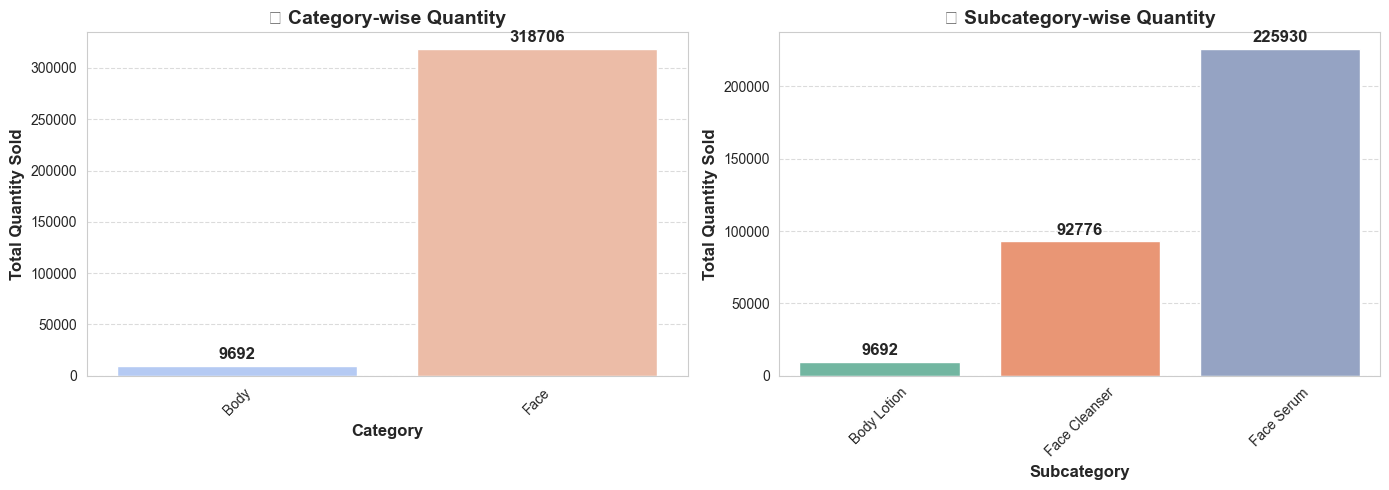

In [20]:
# Grouping data
category_df = df.groupby("category")["quantity"].sum()
sub_category_df = df.groupby("sub_category")["quantity"].sum()

# Creating a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- CATEGORY BAR CHART ---
colors_category = sns.color_palette("coolwarm", len(category_df))  # Cool-warm color gradient
sns.barplot(x=category_df.index, y=category_df.values, ax=axes[0], palette=colors_category)

# Add value labels
for i, v in enumerate(category_df.values):
    axes[0].text(i, v + max(category_df.values) * 0.02, str(int(v)), ha="center", fontsize=12, fontweight="bold")

axes[0].set_title("📌 Category-wise Quantity", fontweight="bold", fontsize=14)
axes[0].set_xlabel("Category", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Total Quantity Sold", fontsize=12, fontweight="bold")
axes[0].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# --- SUB-CATEGORY BAR CHART ---
colors_subcategory = sns.color_palette("Set2", len(sub_category_df))  # Bright pastel color scheme
sns.barplot(x=sub_category_df.index, y=sub_category_df.values, ax=axes[1], palette=colors_subcategory)

# Add value labels
for i, v in enumerate(sub_category_df.values):
    axes[1].text(i, v + max(sub_category_df.values) * 0.02, str(int(v)), ha="center", fontsize=12, fontweight="bold")

axes[1].set_title("📈 Subcategory-wise Quantity", fontweight="bold", fontsize=14)
axes[1].set_xlabel("Subcategory", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Total Quantity Sold", fontsize=12, fontweight="bold")
axes[1].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for better readability
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
import plotly.express as px

plt.figure(figsize=(6, 4))
# Ensure 'sub_category' and 'quantity' columns exist
fig = px.violin(df, x="sub_category", y="quantity", color="sub_category")

# Show the interactive plot
fig.show()


<Figure size 600x400 with 0 Axes>


🔍 **Testing Period: 4**


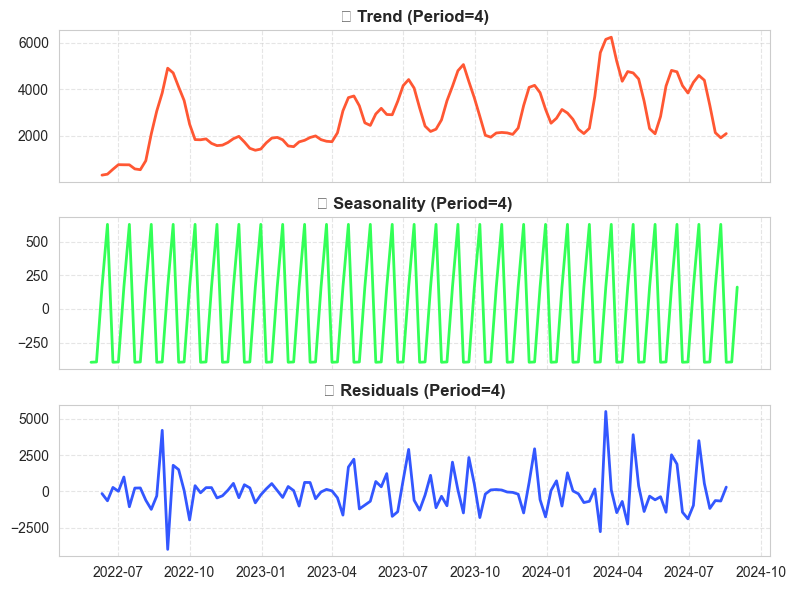


🔍 **Testing Period: 7**


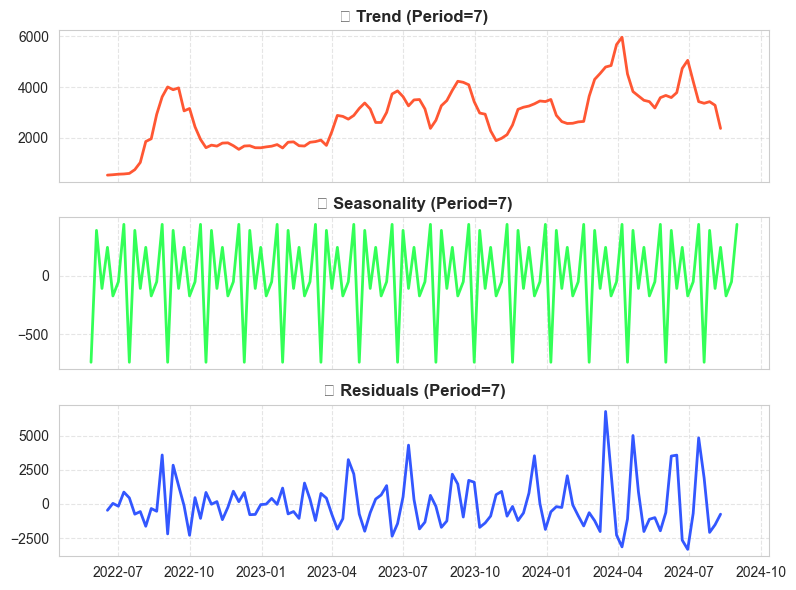


🔍 **Testing Period: 14**


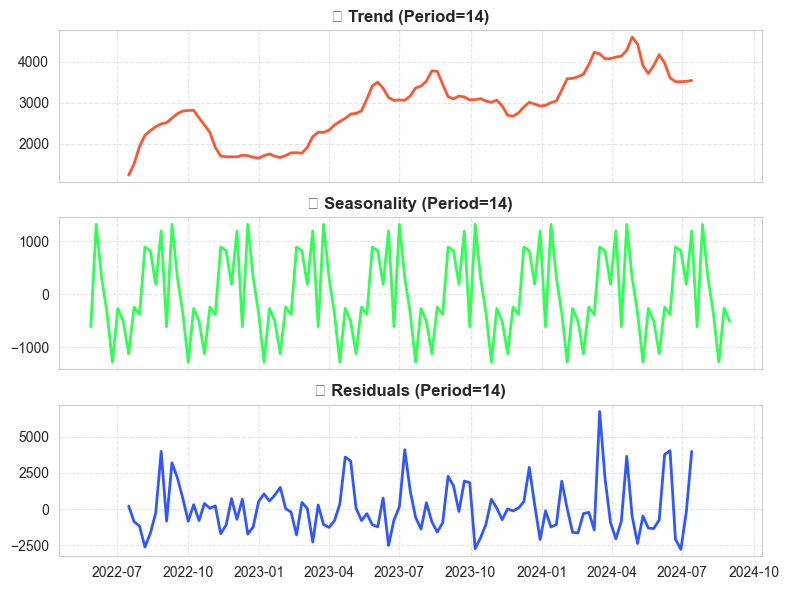


🔍 **Testing Period: 30**


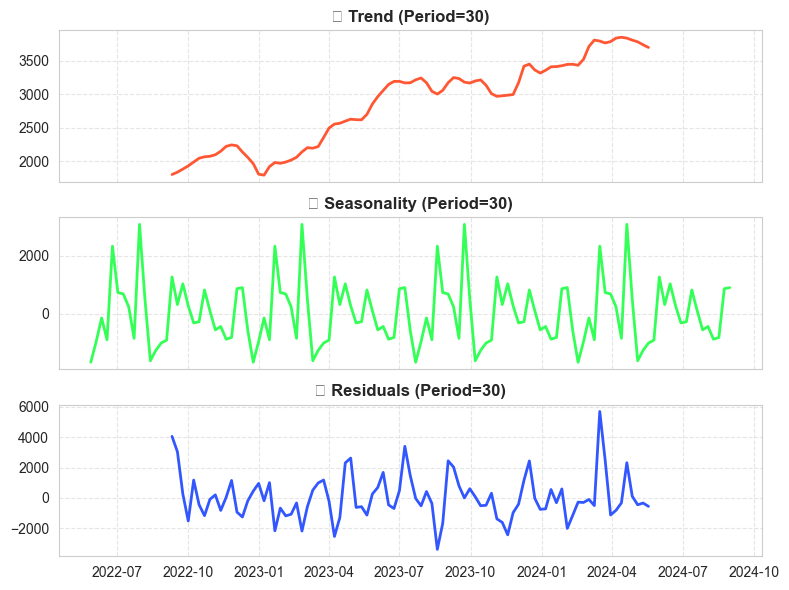

In [22]:
# Define color palettes
colors = ["#FF5733", "#33FF57", "#3357FF"]  # Bright colors (Red, Green, Blue)

for period in [4, 7, 14, 30]:  # Weekly, bi-weekly, and monthly trends
    print(f"\n🔍 **Testing Period: {period}**")
    
    # Perform seasonal decomposition
    decomposed = seasonal_decompose(df_new, model='additive', period=period)
    
    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

    # --- TREND ---
    axes[0].plot(decomposed.trend, color=colors[0], linewidth=2)
    axes[0].set_title(f'📈 Trend (Period={period})', fontsize=12, fontweight="bold")
    axes[0].grid(True, linestyle="--", alpha=0.5)

    # --- SEASONALITY ---
    axes[1].plot(decomposed.seasonal, color=colors[1], linewidth=2)
    axes[1].set_title(f'🌊 Seasonality (Period={period})', fontsize=12, fontweight="bold")
    axes[1].grid(True, linestyle="--", alpha=0.5)

    # --- RESIDUALS ---
    axes[2].plot(decomposed.resid, color=colors[2], linewidth=2)
    axes[2].set_title(f'🧐 Residuals (Period={period})', fontsize=12, fontweight="bold")
    axes[2].grid(True, linestyle="--", alpha=0.5)

    # Tight layout & show plot
    plt.tight_layout()
    plt.show()

In [25]:
df_new.describe()

,quantity
count,119.000000
mean,2759.647059
std,2094.876444
min,203.000000
25%,1593.000000
50%,2129.000000
75%,3236.500000
max,11816.000000


# **Insights**

- The **distribution of quantity** is right-skewed, as observed in the **distplot**, while the **boxplot highlights the presence of significant outliers.**

- **Outlier Handling**: Given the presence of extreme values, further **investigation and possible treatment** of outliers may help improve predictive modeling accuracy.

- After **cleaning and aggregating** the data, we observed that the **minimum quantity sold is 203, the maximum is 11,816, and the standard deviation is 2,094**, indicating high variability in the dataset.

- The **trend analysis** of quantity sold shows a **gradual upward movement**, with **no clear seasonality** detected in the data.

- **Brand B1 dominates sales**, contributing to **70% of the total quantity sold**, while **Channel 2 emerges as the top-performing sales channel.**

- Within the **category segmentation**, face **products account for over 95% of total sales**, with **face cleansers and face serums being the most popular items.**